# Data Source
Drone lidar surveys of the Eastern Denali Fault, Yukon, Sep 2021 & Aug 2022, from OpenTopography

https://portal.opentopography.org/dataspace/dataset?opentopoID=OTDS.102023.32608.1

File: 	BURW_final_ULS_reproj.laz

---

# PDAL - Point Data Abstraction Library
PDAL is a C++ library for translating and manipulating point cloud data.

# GDAL - Geospatial Data Abstraction Library
GDAL is a translator library for raster and vector geospatial data formats.

In [1]:
!pip install pdal laspy numpy matplotlib rasterio

# Load and Run the PDAL Pipeline

In [2]:
import pdal
import json

# Load the pipeline JSON file
with open("pipeline.json", "r") as f:
    pipeline_json = json.load(f)

# Create and execute PDAL pipeline
pipeline = pdal.Pipeline(json.dumps(pipeline_json))
pipeline.execute()

print("✅ LiDAR processing completed!")
print("📂 Outputs: output_ground.las, output_dem.tif")


✅ LiDAR processing completed!
📂 Outputs: output_ground.las, output_dem.tif


# Visualise the Processed Data

### Load Processed Ground Points

In [3]:
import laspy
import numpy as np

# Load processed LAS file
las = laspy.read("output_ground.las")

# Extract XYZ coordinates
x, y, z = las.x, las.y, las.z
print(f"Loaded {len(x)} LiDAR points.")


Loaded 9397291 LiDAR points.


### Plot 3D Visualisation

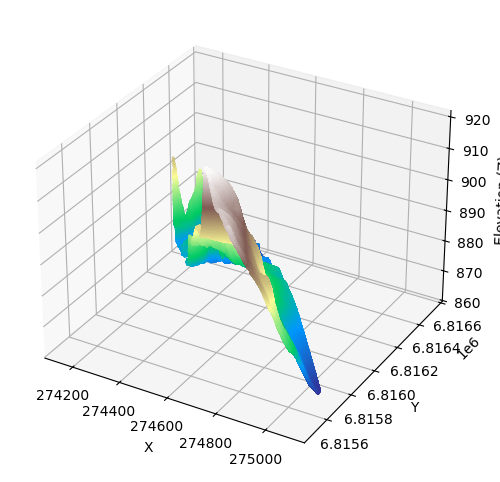

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='terrain', s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation (Z)')
plt.show()


### More plots with subsample

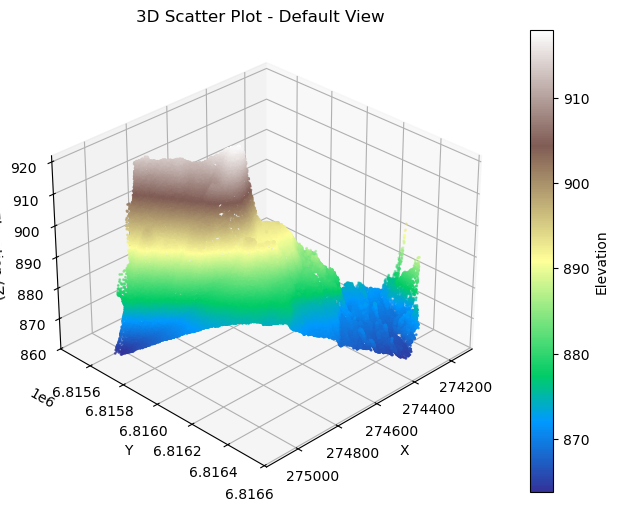

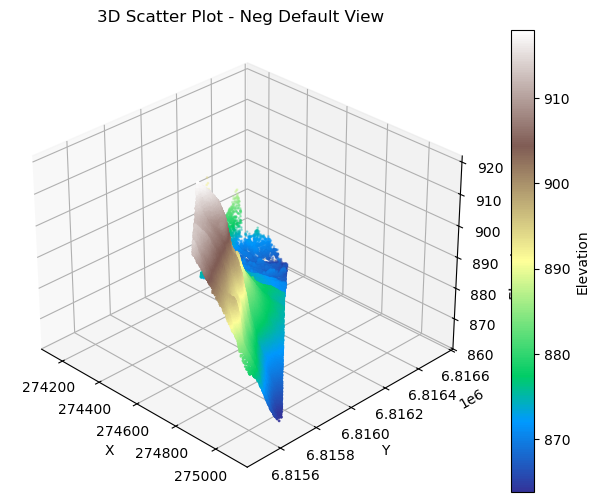

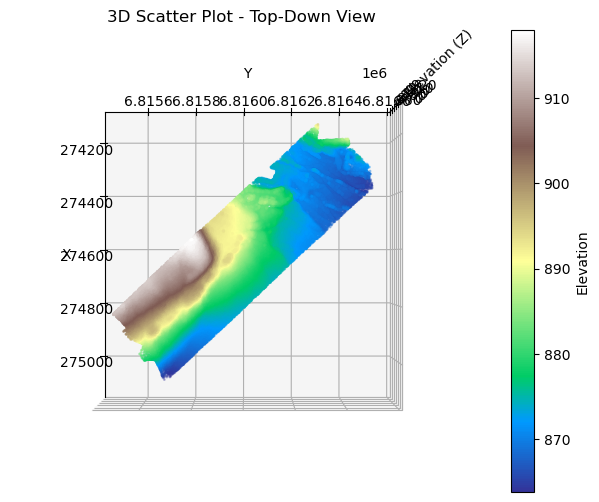

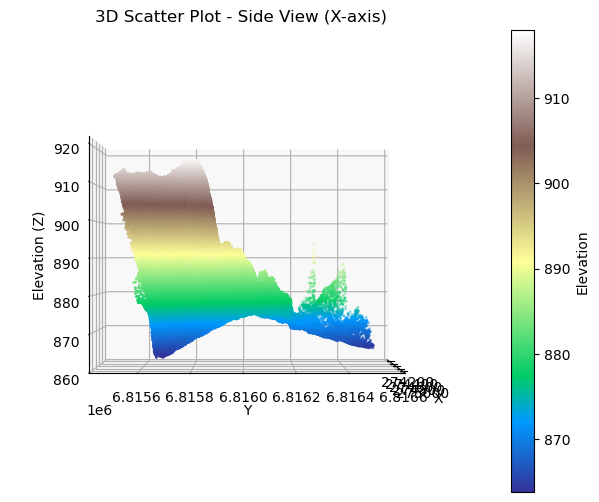

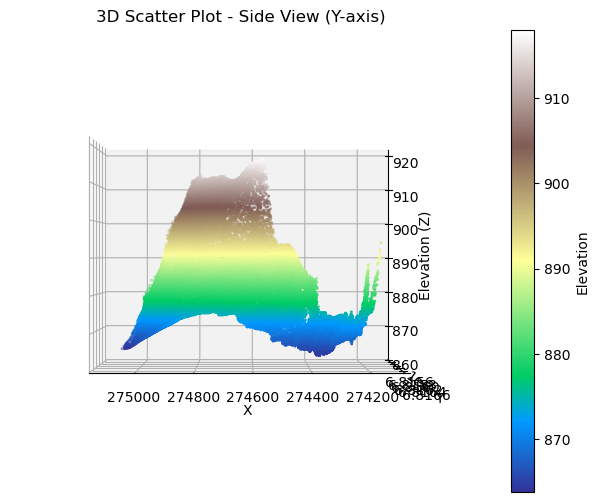

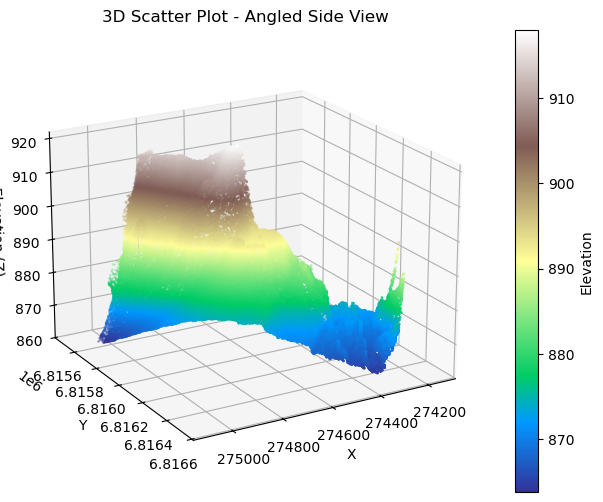

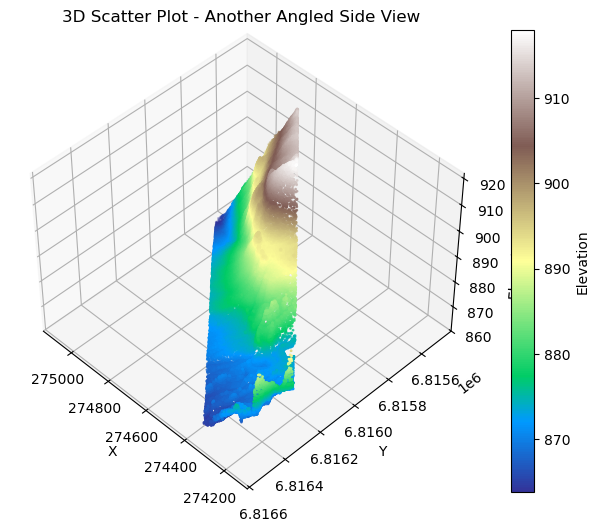

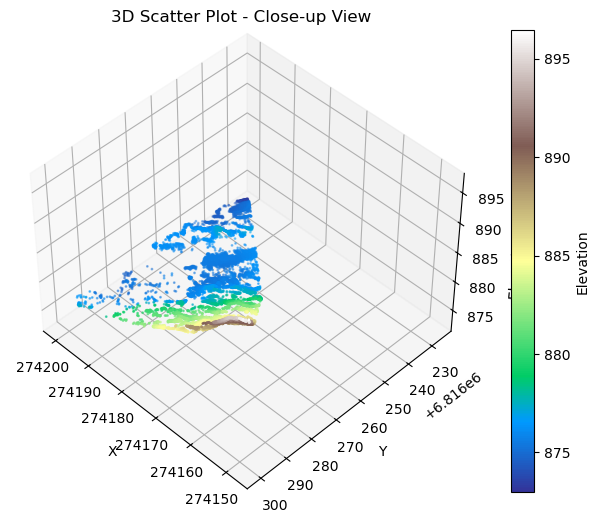

In [9]:
def plot_3d_scatter(x, y, z, elev=30, azim=45, title="3D Scatter Plot", subsample_rate=1):
    """
    Plots a 3D scatter plot with specified elevation and azimuth angles.

    Args:
        x (array-like): X coordinates.
        y (array-like): Y coordinates.
        z (array-like): Z coordinates (elevation).
        elev (float): Elevation angle (in degrees).
        azim (float): Azimuth angle (in degrees).
        title (str): Title for the plot.
        subsample_rate (int): To avoid plotting too much data, only plot one point every subsample_rate
    """
    # Subsample the data
    x_subsampled = x[::subsample_rate]
    y_subsampled = y[::subsample_rate]
    z_subsampled = z[::subsample_rate]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x_subsampled, y_subsampled, z_subsampled, c=z_subsampled, cmap='terrain', s=1)

    # Customise the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Elevation (Z)')
    ax.set_title(title)

    # Colourbar for elevation
    cbar = fig.colorbar(scatter)
    cbar.set_label('Elevation')

    # Set view angle
    ax.view_init(elev=elev, azim=azim)

    plt.show()

# Using different angles

# Subsample rate for better performance (plot 1 out of every 100 points)
subsample_rate = 100

plot_3d_scatter(x, y, z, title="3D Scatter Plot - Default View", subsample_rate=subsample_rate)
plot_3d_scatter(x, y, z, elev=30, azim=-45, title="3D Scatter Plot - Neg Default View", subsample_rate=subsample_rate)
plot_3d_scatter(x, y, z, elev=90, azim=0, title="3D Scatter Plot - Top-Down View", subsample_rate=subsample_rate)
plot_3d_scatter(x, y, z, elev=0, azim=0, title="3D Scatter Plot - Side View (X-axis)", subsample_rate=subsample_rate)
plot_3d_scatter(x, y, z, elev=0, azim=90, title="3D Scatter Plot - Side View (Y-axis)", subsample_rate=subsample_rate)
plot_3d_scatter(x, y, z, elev=20, azim=60, title="3D Scatter Plot - Angled Side View", subsample_rate=subsample_rate)
plot_3d_scatter(x, y, z, elev=45, azim=135, title="3D Scatter Plot - Another Angled Side View", subsample_rate=subsample_rate)

# More close up view (using a smaller subset of the data)
subset_size = 10000  
x_subset = x[:subset_size]
y_subset = y[:subset_size]
z_subset = z[:subset_size]
plot_3d_scatter(x_subset, y_subset, z_subset, elev=45, azim=135, title="3D Scatter Plot - Close-up View",subsample_rate=1)